In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [18]:
df = pd.read_csv("reading_data/Advertising.csv")

In [19]:
df = df.iloc[:,1:len(df.columns)]
df.head()
#This data contains advertising investments on TV, radio, newspaper and sales according to these investments.

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


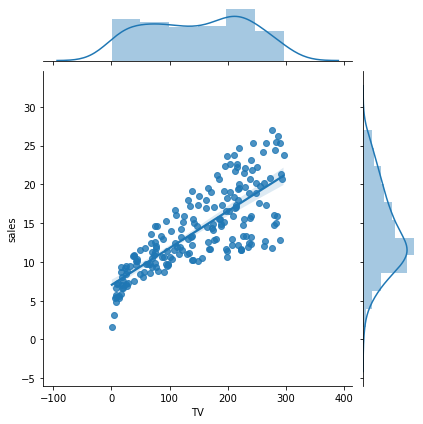

In [23]:
sns.jointplot(x="TV",y ="sales",data = df, kind="reg");

In [33]:
x = df[["TV"]]

In [34]:
y = df[["sales"]]

In [35]:
reg = LinearRegression()

In [36]:
model = reg.fit(x,y)

In [39]:
model.coef_

array([[0.04753664]])

In [40]:
model.intercept_

array([7.03259355])

In [41]:
#R square
#Gives the information of how much of the y can be explained by x
model.score(x,y)

0.611875050850071

Text(0.5, 0, 'TV Expenses')

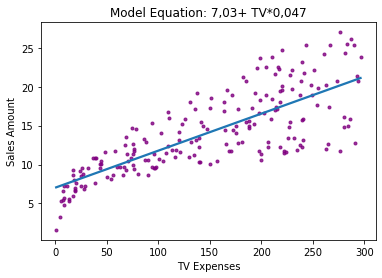

In [51]:
g = sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={"color":"purple","s":9})
g.set_title("Model Equation: 7,03+ TV*0,047")
g.set_ylabel("Sales Amount")
g.set_xlabel("TV Expenses")

sales = 7.03 + 0.047*TV

In [55]:
model.predict([[52]])

array([[9.50449885]])

In [57]:
sample_tv = [[16],[142],[22]]
model.predict(sample_tv)

array([[ 7.7931798 ],
       [13.78279649],
       [ 8.07839964]])

In [69]:
model2 = reg.fit(df.iloc[:,0:3],df["sales"])

In [70]:
model2.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [71]:
model2.intercept_

2.9388893694594085

***STAGE 2***

We use scikit-learn more likely but the output of summary is very important for us

In [91]:
import statsmodels.api as sm

In [78]:
lm = sm.OLS(df["sales"],df.iloc[:,0:3])

In [79]:
model3 = lm.fit()

In [80]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Thu, 02 Apr 2020   Prob (F-statistic):                   2.43e-171
Time:                        16:04:00   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__scikit-learn__

In [94]:
model4 = LinearRegression().fit(df.iloc[:,0:3],df["sales"])

In [102]:
print(model4.intercept_,
      model4.coef_)
#We can see that we have same data but different coefficients at different models

2.9388893694594085 [ 0.04576465  0.18853002 -0.00103749]


In [103]:
from sklearn.metrics import mean_squared_error

In [107]:
MSE = mean_squared_error(df["sales"],model4.predict(df.iloc[:,0:3]))
MSE
#MSE

2.7841263145109365

In [108]:
RMSE = MSE**2
RMSE
#RMSE

7.75135933515225

In [109]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test =train_test_split(df.iloc[:,0:3],df["sales"], test_size=0.20,random_state=99)

In [112]:
model5 = LinearRegression().fit(X_train,y_train)

In [115]:
np.sqrt(mean_squared_error(y_train,model5.predict(X_train)))
#This error is TRAIN ERROR

1.723682482265075

In [116]:
np.sqrt(mean_squared_error(y_test,model5.predict(X_test)))
#This error is TEST ERROR

1.4312783138301641

**K FOLD CROSS VALIDATION**

In [117]:
from sklearn.model_selection import cross_val_score

In [143]:
cross_val_score(model5, X_train, y_train, cv= 10,scoring ="neg_mean_squared_error")

array([-2.1019073 , -2.48953197, -3.09704214, -2.34694216, -3.68175761,
       -1.8691401 , -3.18173007, -4.1927349 , -2.17128376, -8.03821974])

In [149]:
(-cross_val_score(model5, X_train, y_train, cv= 15,scoring ="neg_mean_squared_error").mean())**1/2
# RMSE acquired with CV

1.659465463461529